#Air BNB Analysis


In [2]:
# connect colab to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
import numpy as np
import pandas as pd

file = "/content/drive/MyDrive/Colab Notebooks/data/Airbnb_Data.csv"
#Define file path from one drive

data = pd.read_csv(file, sep=",")

In [ ]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
import pandas as pd

# Step 1: Find out how many missing values there are in 'review_scores_rating'
missing_values_count = data['review_scores_rating'].isna().sum()
print("Number of missing values in 'review_scores_rating':", missing_values_count)


Number of missing values in 'review_scores_rating': 16722


In [4]:
# Step 2: Remove rows with missing values in 'review_scores_rating'
data = data.dropna(subset=['review_scores_rating'])
# Get the number of rows left after removing missing values
num_rows_left = data.shape[0]

print("Number of rows left after removing missing values:", num_rows_left)

Number of rows left after removing missing values: 57389


In [5]:
# List of columns to drop
columns_to_drop = ['id', 'first_review', 'last_review', 'latitude', 'longitude', 'thumbnail_url', 'zipcode']

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

# Optionally, you can reset the index after dropping columns
data = data.reset_index(drop=True)

In [6]:
# Find the sum of NA values in the DataFrame
na_sum = data.isna().sum()

print("Sum of NA values in each column:")
print(na_sum)

Sum of NA values in each column:
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                  159
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
host_has_profile_pic       141
host_identity_verified     141
host_response_rate        9386
host_since                 141
instant_bookable             0
name                         0
neighbourhood             5046
number_of_reviews            0
review_scores_rating         0
bedrooms                    70
beds                        62
dtype: int64


In [7]:
# Drop remaining NA values
data = data.dropna()

In [8]:
# Find the sum of NA values in the DataFrame
na_sum = data.isna().sum()

print("Sum of NA values in each column:")
print(na_sum)
# Get the sum of rows in the DataFrame
num_rows = data.shape[0]

print("Number of rows in the DataFrame:", num_rows)

Sum of NA values in each column:
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64
Number of rows in the DataFrame: 43092


##Data Exploration

<ipython-input-135-0d972fda19fc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='city', y='log_price', data=average_data, palette='coolwarm')


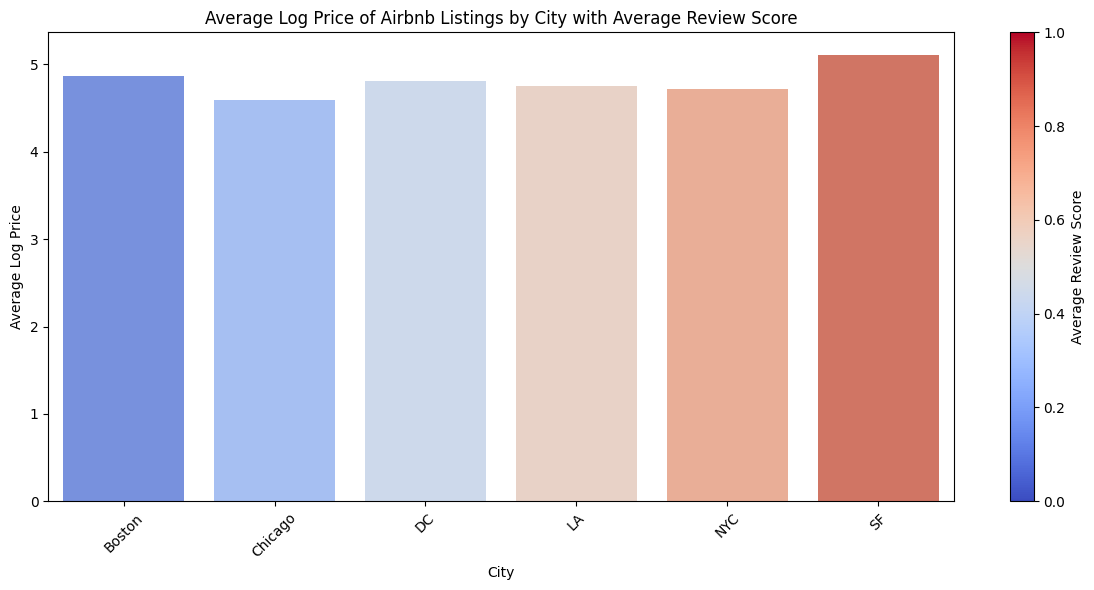

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average log_price and average review_scores_rating by city
average_data = data.groupby('city').agg({'log_price': 'mean', 'review_scores_rating': 'mean'}).reset_index()

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Create the bar chart
bars = sns.barplot(x='city', y='log_price', data=average_data, palette='coolwarm')

# Add average review score as color
color_data = average_data['review_scores_rating']
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='coolwarm'), ax=bars)
cbar.set_label('Average Review Score')

# Customize labels and title
plt.xlabel('City')
plt.ylabel('Average Log Price')
plt.title('Average Log Price of Airbnb Listings by City with Average Review Score')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

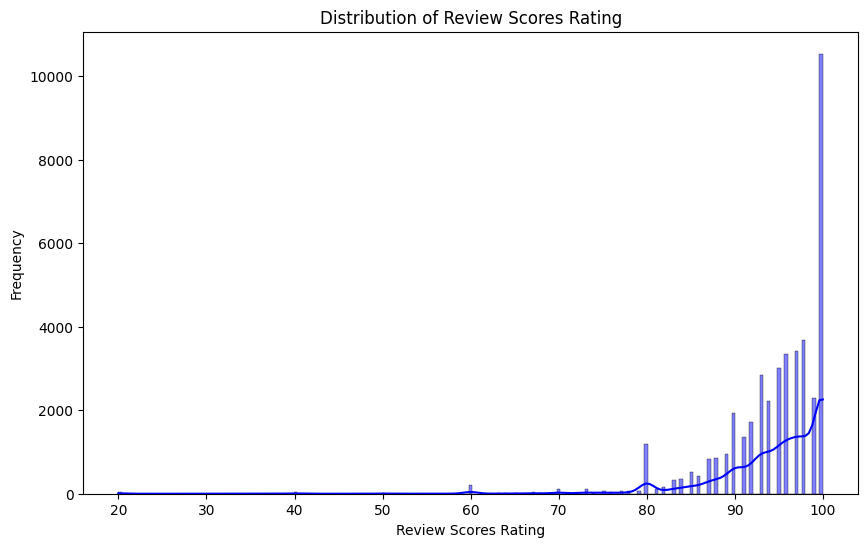

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create the histogram or KDE plot
sns.histplot(data['review_scores_rating'], kde=True, color='blue')

# Customize labels and title
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores Rating')

# Show plot
plt.show()

In [ ]:
# Calculate summary statistics
summary_stats = data['review_scores_rating'].describe()

# Get the 75th percentile
percentile_75 = summary_stats['75%']

print("75th Percentile (Third Quartile):", percentile_75)

75th Percentile (Third Quartile): 99.0


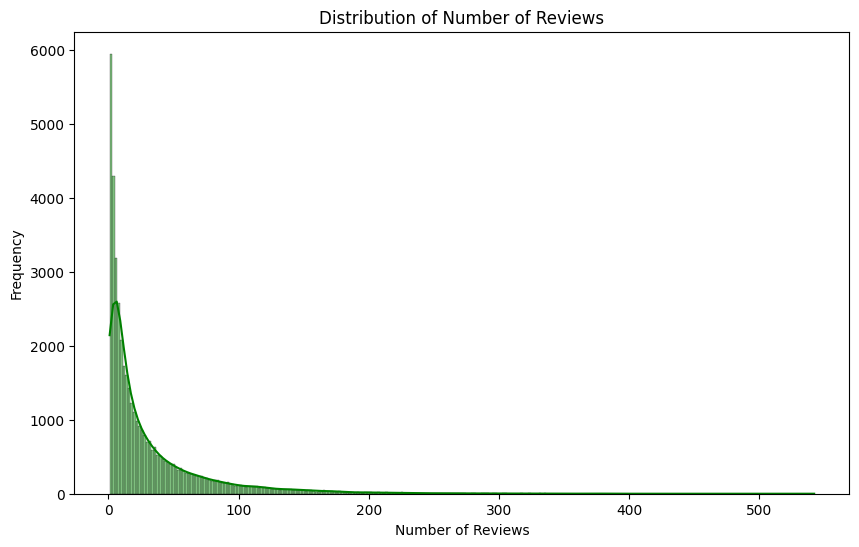

25th Percentile (First Quartile) of Number of Reviews: 10.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create the histogram or KDE plot
sns.histplot(data['number_of_reviews'], kde=True, color='green')

# Customize labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Reviews')

# Show plot
plt.show()
# Calculate the 25th percentile (first quartile) of the number_of_reviews variable
percentile_25 = data['number_of_reviews'].quantile(0.40)

print("25th Percentile (First Quartile) of Number of Reviews:", percentile_25)


In [10]:
# Filter the data to include entries with a review score of 100 and at least 5 number_of_reviews,
# as well as entries with a review score not equal to 100
filtered_data = data[(data['review_scores_rating'] == 100) & (data['number_of_reviews'] >= 15) | (data['review_scores_rating'] != 100)]

# Create a new DataFrame with the filtered data
new_df = filtered_data.copy()

# Display the number of rows in the new DataFrame
print("Number of rows in the new DataFrame:", len(new_df))

Number of rows in the new DataFrame: 33503


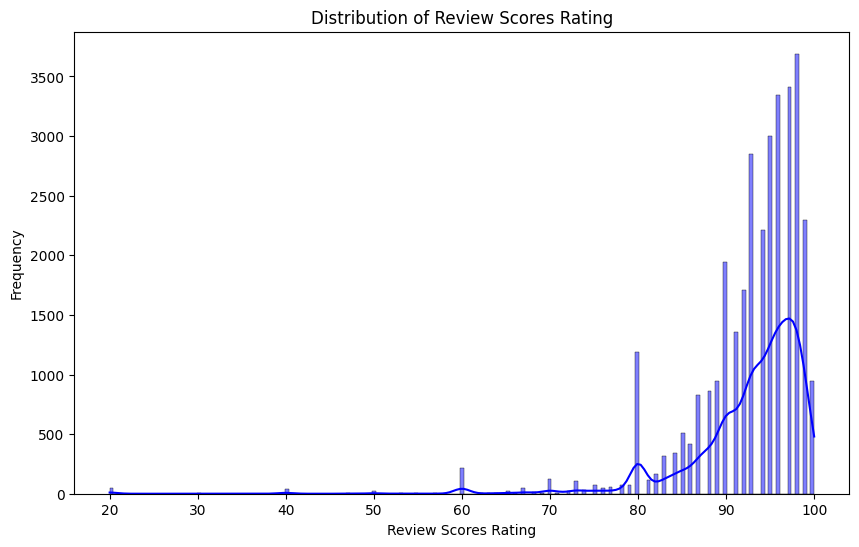

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create the histogram or KDE plot
sns.histplot(new_df['review_scores_rating'], kde=True, color='blue')

# Customize labels and title
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores Rating')

# Show plot
plt.show()

In [ ]:
# Calculate the 60th percentile (first quartile) of the number_of_reviews variable
percentile_60 = new_df['review_scores_rating'].quantile(0.60)

print("75th Percentile (Third Quartile) of Rating:", percentile_60)

75th Percentile (Third Quartile) of Rating: 96.0


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a new variable 'good_review' based on the review_scores_rating column
new_df['good_review'] = new_df['review_scores_rating'] >= 92


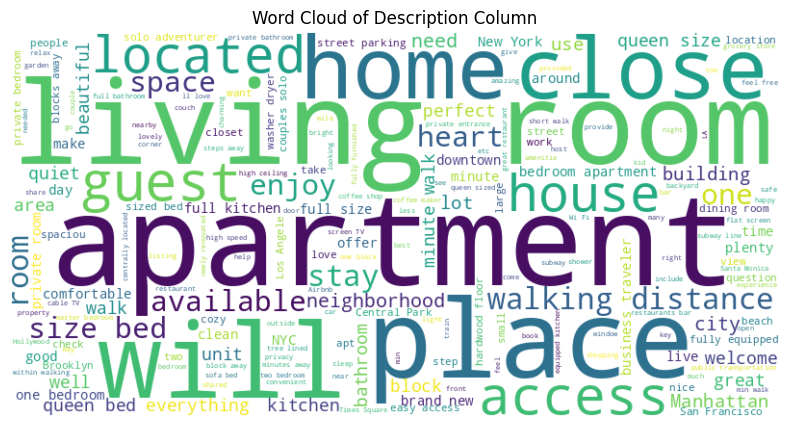

In [ ]:
# Create a word cloud of the 'description' column
text = ' '.join(new_df['description'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description Column')
plt.show()

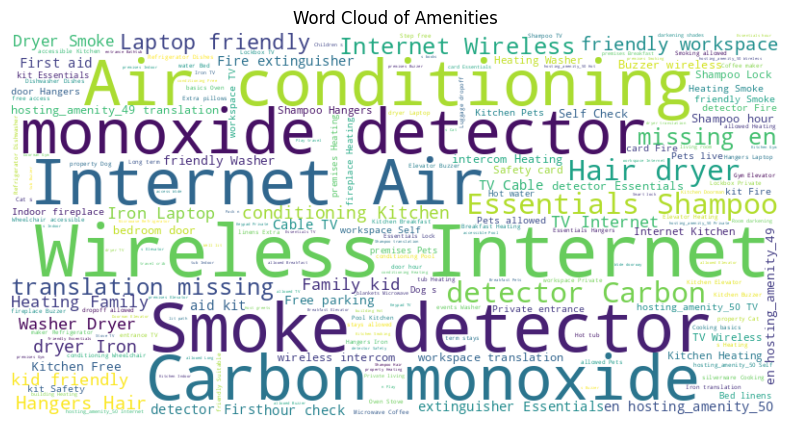

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract amenities data from DataFrame
amenities_data = new_df['amenities']

# Convert amenities data into a single string
amenities_text = ' '.join(amenities_data)

# Define the word cloud parameters
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(amenities_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Amenities')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Prep the data
X = new_df['description']
y = new_df['good_review']

In [ ]:
# Choose a vectorization method
# Starting with TF-IDF vectorization
vectorizer = TfidfVectorizer()

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Vectorize the description text
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train a classification model
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
#  Evaluate the model
y_pred = classifier.predict(X_test_vect)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.51      0.01      0.02      2065
        True       0.69      1.00      0.82      4636

    accuracy                           0.69      6701
   macro avg       0.60      0.50      0.42      6701
weighted avg       0.64      0.69      0.57      6701



In [ ]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  22 2043]
 [  21 4615]]


In [ ]:
# Print samples of true values and predicted values
for true_value, predicted_value in zip(y_test[:10], y_pred[:10]):
    print("True Value:", true_value, "| Predicted Value:", predicted_value)

True Value: False | Predicted Value: True
True Value: False | Predicted Value: True
True Value: False | Predicted Value: True
True Value: True | Predicted Value: True
True Value: False | Predicted Value: True
True Value: False | Predicted Value: True
True Value: True | Predicted Value: True
True Value: True | Predicted Value: True
True Value: True | Predicted Value: True
True Value: True | Predicted Value: True


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Prepare the data for boolean vectorization to compare
X = new_df['description']
y = new_df['good_review']

# Step 2: Choose a vectorization method (Boolean vectorization)
vectorizer = CountVectorizer(binary=True)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 4: Vectorize the description text
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 5: Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
# Step 6: Evaluate the model
y_pred = classifier.predict(X_test_vect)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

##Boolean is better

Accuracy: 0.6798985226085659


Classification Report:
              precision    recall  f1-score   support

       False       0.48      0.41      0.44      2065
        True       0.75      0.80      0.78      4636

    accuracy                           0.68      6701
   macro avg       0.61      0.60      0.61      6701
weighted avg       0.67      0.68      0.67      6701

Confusion Matrix:
[[ 840 1225]
 [ 920 3716]]


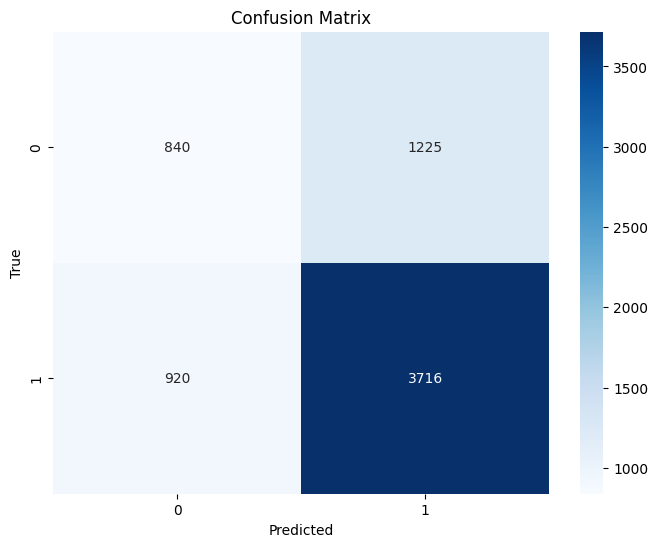

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Step 6: Evaluate the model
y_pred = classifier.predict(X_test_vect)

# Step 7: Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

##Try with higher number as good review

In [9]:
# Filter the data to include entries with a review score of 100 and at least 5 number_of_reviews,
# as well as entries with a review score not equal to 100
filtered_data = data[(data['review_scores_rating'] == 100) & (data['number_of_reviews'] >= 15) | (data['review_scores_rating'] != 100)]

# Create a new DataFrame with the filtered data
new_df = filtered_data.copy()

# Display the number of rows in the new DataFrame
print("Number of rows in the new DataFrame:", len(new_df))

Number of rows in the new DataFrame: 33503


In [ ]:
# Create a new variable 'good_review' based on the review_scores_rating column
new_df['good_review'] = new_df['review_scores_rating'] >= 95

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Prepare the data for boolean vectorization to compare
X = new_df['description']
y = new_df['good_review']

# Step 2: Choose a vectorization method (Boolean vectorization)
vectorizer = CountVectorizer(binary=True)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Vectorize the description text
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 5: Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
# Step 6: Evaluate the model
y_pred = classifier.predict(X_test_vect)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

##Boolean is better

Accuracy: 0.6242351887777944


In [ ]:


# Step 7: Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

       False       0.63      0.64      0.64      3438
        True       0.62      0.60      0.61      3263

    accuracy                           0.62      6701
   macro avg       0.62      0.62      0.62      6701
weighted avg       0.62      0.62      0.62      6701

Confusion Matrix:
[[2213 1225]
 [1293 1970]]


##TRY SVM for better results


In [12]:
# Filter the data to include entries with a review score of 100 and at least 5 number_of_reviews,
# as well as entries with a review score not equal to 100
filtered_data = data[(data['review_scores_rating'] == 100) & (data['number_of_reviews'] >= 15) | (data['review_scores_rating'] != 100)]

# Create a new DataFrame with the filtered data
new_df = filtered_data.copy()

# Display the number of rows in the new DataFrame
print("Number of rows in the new DataFrame:", len(new_df))

Number of rows in the new DataFrame: 33503


In [13]:
# Create a new variable 'good_review' based on the review_scores_rating column
new_df['good_review'] = new_df['review_scores_rating'] >= 92

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Prepare the data
X = new_df['description']
y = new_df['good_review']

# Step 2: Choose a vectorization method (Boolean vectorization)
vectorizer = CountVectorizer(binary=True)


In [ ]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Step 4: Vectorize the description text
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [ ]:
# Step 5: Train a Support Vector Machine classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_vect, y_train)

# Step 6: Evaluate the model
y_pred = svm_classifier.predict(X_test_vect)

In [ ]:
# Step 7: Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.11      0.20      2065
        True       0.71      0.98      0.83      4636

    accuracy                           0.72      6701
   macro avg       0.74      0.55      0.51      6701
weighted avg       0.73      0.72      0.63      6701

Confusion Matrix:
[[ 236 1829]
 [  75 4561]]


In [ ]:
# Find the index of the first false positive
false_positive_index = next((i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred and not true), None)
if false_positive_index is not None:
    false_positive_description = X_test.iloc[false_positive_index]
    print("Example of a False Positive:")
    print("- ", false_positive_description)
else:
    print("No False Positives Found.")

# Find the index of the first true positive
true_positive_index = next((i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred and true), None)
if true_positive_index is not None:
    true_positive_description = X_test.iloc[true_positive_index]
    print("\nExample of a True Positive:")
    print("- ", true_positive_description)
else:
    print("\nNo True Positives Found.")

Example of a False Positive:
-  You'll love your stay in our 1 bedroom apartment in Culver City. A few blocks away from the restaurants on Culver's Main Street, near Sony Picture Studios, and a short drive to Venice Beach and Santa Monica Pier. Culver is a great place to stay while you explore the LA sights! This apartment opens up into the bright and spacious open living room/dining room area. The living room has a 55 inch TV  (with ROKU streaming) and a sofa that seats 3 and turns into another bed. The kitchen will be stocked with the essentials you'll need for your stay (pots, pans, plates, utensils, etc). Continue to the back of the apartment and to the left is the bathroom (with a shower/tub combo) and to the right you'll find the bedroom furnished with a comfortable queen sized mattress and plenty of closet space and floor-to-ceiling mirrors.  There is tandem off street parking for 2 cars. Note: When booking, please keep in mind, you're renting a space in a neighborhood where oth

In [ ]:
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Prepare the data
X = new_df['description']
y = new_df['good_review']

In [ ]:
# Step 2: Choose a vectorization method (Boolean vectorization)
vectorizer = CountVectorizer(binary=True)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Vectorize the description text
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [ ]:
# Step 5: Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vect, y_train)

# Step 6: Train a Support Vector Machine classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_resampled, y_train_resampled)


SVC()

Classification Report:
              precision    recall  f1-score   support

       False       0.59      0.29      0.39      2065
        True       0.74      0.91      0.82      4636

    accuracy                           0.72      6701
   macro avg       0.66      0.60      0.60      6701
weighted avg       0.69      0.72      0.68      6701

Confusion Matrix:
[[ 594 1471]
 [ 420 4216]]


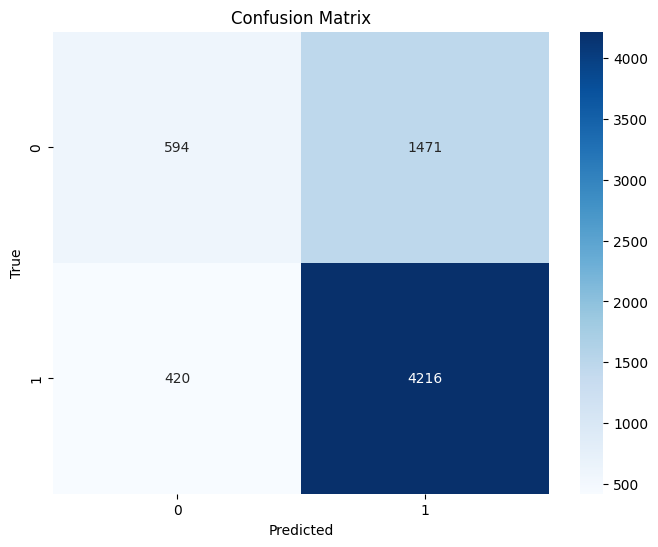

In [ ]:
# Step 7: Evaluate the model
y_pred = svm_classifier.predict(X_test_vect)

# Step 8: Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Iterate through test data and print examples for true positive, false positive, and true negative
for idx, (desc, true_label, pred_label) in enumerate(zip(X_test, y_test, y_pred)):
    if true_label == 1 and pred_label == 1:  # True Positive
        print("True Positive Example:")
        print("Description:", desc)
        break  # Stop after finding one true positive example

for idx, (desc, true_label, pred_label) in enumerate(zip(X_test, y_test, y_pred)):
    if true_label == 0 and pred_label == 1:  # False Positive
        print("\nFalse Positive Example:")
        print("Description:", desc)
        break  # Stop after finding one false positive example

for idx, (desc, true_label, pred_label) in enumerate(zip(X_test, y_test, y_pred)):
    if true_label == 0 and pred_label == 0:  # True Negative
        print("\nTrue Negative Example:")
        print("Description:", desc)
        break  # Stop after finding one true negative example

True Positive Example:
Description: You'll love your stay in our 1 bedroom apartment in Culver City. A few blocks away from the restaurants on Culver's Main Street, near Sony Picture Studios, and a short drive to Venice Beach and Santa Monica Pier. Culver is a great place to stay while you explore the LA sights! This apartment opens up into the bright and spacious open living room/dining room area. The living room has a 55 inch TV  (with ROKU streaming) and a sofa that seats 3 and turns into another bed. The kitchen will be stocked with the essentials you'll need for your stay (pots, pans, plates, utensils, etc). Continue to the back of the apartment and to the left is the bathroom (with a shower/tub combo) and to the right you'll find the bedroom furnished with a comfortable queen sized mattress and plenty of closet space and floor-to-ceiling mirrors.  There is tandem off street parking for 2 cars. Note: When booking, please keep in mind, you're renting a space in a neighborhood where

##Get Frequent Predictive Words

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text as sklearn_text
import random

# Randomly sample your dataset
sample_size = 10000  # Adjust this as needed
sample_indices = random.sample(range(len(X)), sample_size)
X_sample = X.iloc[sample_indices]
y_sample = y.iloc[sample_indices]

# Create a TF-IDF vectorizer with stopwords removed
stop_words = 'english'  # Use 'english' to indicate the default English stopwords
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)



In [ ]:
# Fit and transform the sampled text data
X_tfidf = tfidf_vectorizer.fit_transform(X_sample)

# Convert the TF-IDF matrix to a DataFrame for easier manipulation
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add the target variable to the DataFrame
tfidf_df['good_review'] = y_sample

# Separate positive and negative instances
positive_reviews = tfidf_df[tfidf_df['good_review'] == 1]
negative_reviews = tfidf_df[tfidf_df['good_review'] == 0]

In [ ]:
# Get the sum of TF-IDF scores for each word in positive and negative reviews
positive_word_counts = positive_reviews.drop('good_review', axis=1).sum(axis=0)
negative_word_counts = negative_reviews.drop('good_review', axis=1).sum(axis=0)

# Sort words by frequency in positive and negative reviews
top_positive_words = positive_word_counts.sort_values(ascending=False).head(10)
top_negative_words = negative_word_counts.sort_values(ascending=False).head(10)

print("Top Ten Positive Words:")
print(top_positive_words)

print("\nTop Ten Negative Words:")
print(top_negative_words)

Top Ten Positive Words:
apartment    57.261779
room         53.564709
bedroom      42.086304
kitchen      37.194229
private      36.488308
bed          34.552134
living       32.187696
place        31.999881
away         31.744581
walk         31.578140
dtype: float64

Top Ten Negative Words:
room         23.016061
apartment    22.004721
bedroom      17.512952
bed          16.414854
kitchen      15.800906
private      15.023107
walk         13.018523
place        12.760495
living       12.595785
located      12.584755
dtype: float64


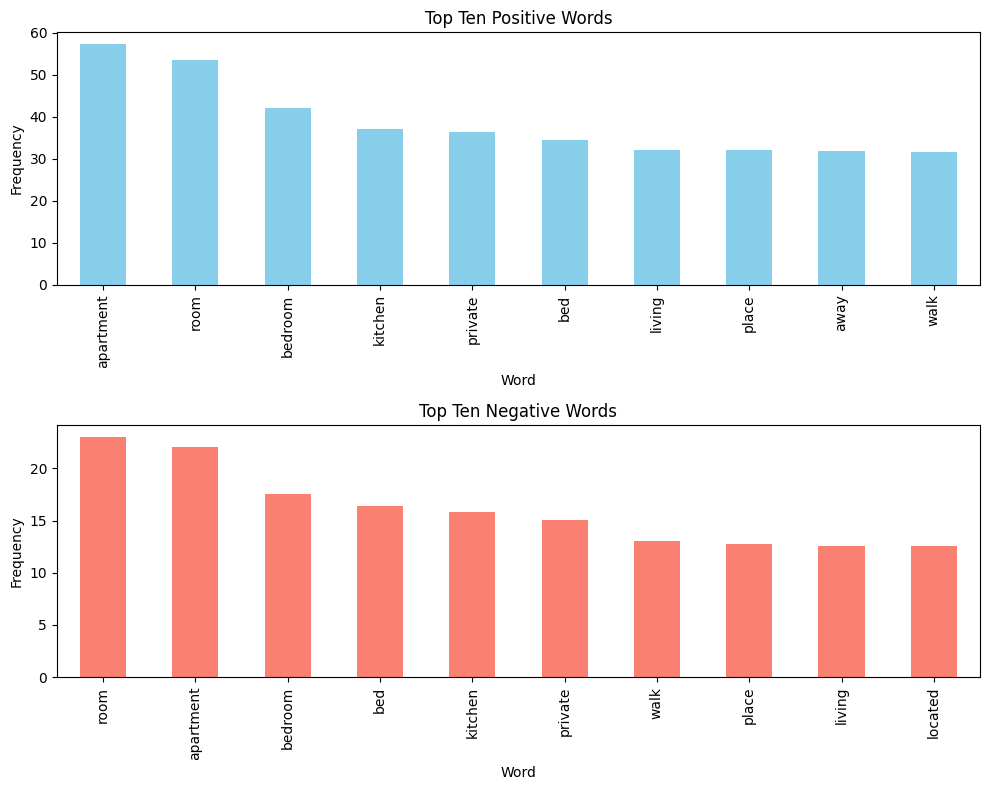

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot top positive words
top_positive_words.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top Ten Positive Words')
axes[0].set_xlabel('Word')
axes[0].set_ylabel('Frequency')

# Plot top negative words
top_negative_words.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Top Ten Negative Words')
axes[1].set_xlabel('Word')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##Logistic Regression

In [15]:
# Replace 't' and 'f' with True and False in boolean features
new_df['host_identity_verified'] = new_df['host_identity_verified'].replace({'t': True, 'f': False})
new_df['instant_bookable'] = new_df['instant_bookable'].replace({'t': True, 'f': False})


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Define the list of numerical, boolean, and categorical features
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
boolean_features = ['cleaning_fee', 'host_identity_verified', 'instant_bookable']
categorical_features = ['city', 'cancellation_policy', 'property_type']

# Manually one-hot encode categorical variables
city_encoding = pd.get_dummies(new_df['city'], prefix='city')
cancellation_policy_encoding = pd.get_dummies(new_df['cancellation_policy'], prefix='cancellation_policy')
property_type_encoding = pd.get_dummies(new_df['property_type'], prefix='property_type')



In [18]:
# Manually encode boolean features as 0 or 1
boolean_encoding = new_df[boolean_features].astype(int)

# Concatenate all encoded features
encoded_features = pd.concat([city_encoding, cancellation_policy_encoding, property_type_encoding, boolean_encoding], axis=1)

# Concatenate numerical features with encoded features
X = pd.concat([new_df[numerical_features], encoded_features], axis=1)



In [28]:

# Define the target variable
target_variable = new_df['log_price']  # or 'review_score' if you're predicting review scores

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=42)



In [31]:
# Fit the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict log price on the test set
log_price_predictions = regression_model.predict(X_test)

# Evaluate the model
log_price_mse = mean_squared_error(y_test, log_price_predictions)
print("Mean Squared Error for Log Price:", log_price_mse)


Mean Squared Error for Log Price: 0.23384281712178892


In [33]:
print("Data types of y_train:", y_train.dtypes)
print("Data types of X_train_with_const:", X_train_with_const.dtypes)


Data types of y_train: float64
Data types of X_train_with_const: const                                  float64
accommodates                             int64
bathrooms                              float64
bedrooms                               float64
beds                                   float64
city_Boston                               bool
city_Chicago                              bool
city_DC                                   bool
city_LA                                   bool
city_NYC                                  bool
city_SF                                   bool
cancellation_policy_flexible              bool
cancellation_policy_moderate              bool
cancellation_policy_strict                bool
cancellation_policy_super_strict_30       bool
cancellation_policy_super_strict_60       bool
property_type_Apartment                   bool
property_type_Bed & Breakfast             bool
property_type_Boat                        bool
property_type_Boutique hotel              

In [34]:
# Convert float64 columns to int64
X_train_with_const['bedrooms'] = X_train_with_const['bedrooms'].astype('int64')
X_train_with_const['beds'] = X_train_with_const['beds'].astype('int64')
X_train_with_const['bathrooms'] = X_train_with_const['bathrooms'].astype('int64')


In [37]:
# Convert boolean features to int64
X_train_with_const = X_train_with_const.astype({'city_Boston': 'int64', 'city_Chicago': 'int64', 'city_DC': 'int64',
                                                'city_LA': 'int64', 'city_NYC': 'int64', 'city_SF': 'int64',
                                                'cancellation_policy_flexible': 'int64', 'cancellation_policy_moderate': 'int64',
                                                'cancellation_policy_strict': 'int64', 'cancellation_policy_super_strict_30': 'int64',
                                                'cancellation_policy_super_strict_60': 'int64',
                                                'property_type_Apartment': 'int64', 'property_type_Bed & Breakfast': 'int64',
                                                'property_type_Boat': 'int64', 'property_type_Boutique hotel': 'int64',
                                                'property_type_Bungalow': 'int64', 'property_type_Cabin': 'int64',
                                                'property_type_Camper/RV': 'int64', 'property_type_Castle': 'int64',
                                                'property_type_Cave': 'int64', 'property_type_Chalet': 'int64',
                                                'property_type_Condominium': 'int64', 'property_type_Dorm': 'int64',
                                                'property_type_Earth House': 'int64', 'property_type_Guest suite': 'int64',
                                                'property_type_Guesthouse': 'int64', 'property_type_Hostel': 'int64',
                                                'property_type_House': 'int64', 'property_type_Hut': 'int64',
                                                'property_type_In-law': 'int64', 'property_type_Loft': 'int64',
                                                'property_type_Other': 'int64', 'property_type_Serviced apartment': 'int64',
                                                'property_type_Tent': 'int64', 'property_type_Timeshare': 'int64',
                                                'property_type_Tipi': 'int64', 'property_type_Townhouse': 'int64',
                                                'property_type_Train': 'int64', 'property_type_Treehouse': 'int64',
                                                'property_type_Vacation home': 'int64', 'property_type_Villa': 'int64',
                                                'property_type_Yurt': 'int64'})

# Fit the regression model
regression_model = sm.OLS(y_train, X_train_with_const)
regression_results = regression_model.fit()

# Print summary of the regression results
print(regression_results.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     475.6
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:27:18   Log-Likelihood:                -18511.
No. Observations:               26802   AIC:                         3.711e+04
Df Residuals:                   26756   BIC:                         3.749e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [41]:
# Remove property_type columns from X_train_with_const
X_train_with_const.drop(columns=[col for col in X_train_with_const.columns if col.startswith('property_type')], inplace=True)

# One-hot encode the room_type variable
room_type_encoding = pd.get_dummies(new_df['room_type'], prefix='room_type')

# Concatenate the one-hot encoded room_type with X_train_with_const
X_train_with_const = pd.concat([X_train_with_const, room_type_encoding], axis=1)


In [55]:
# Convert boolean room type variables to float64
X_train_with_const['room_type_Entire home/apt'] = X_train_with_const['room_type_Entire home/apt'].astype(float)
X_train_with_const['room_type_Private room'] = X_train_with_const['room_type_Private room'].astype(float)
X_train_with_const['room_type_Shared room'] = X_train_with_const['room_type_Shared room'].astype(float)




In [54]:
# Drop rows with missing values
X_train_with_const.dropna(inplace=True)

# Fit the regression model
regression_model = sm.OLS(y_train.loc[X_train_with_const.index], X_train_with_const)
regression_results = regression_model.fit()

# Print summary of the regression results
print(regression_results.summary())



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2431.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:46:03   Log-Likelihood:                -13879.
No. Observations:               26802   AIC:                         2.779e+04
Df Residuals:                   26784   BIC:                         2.794e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

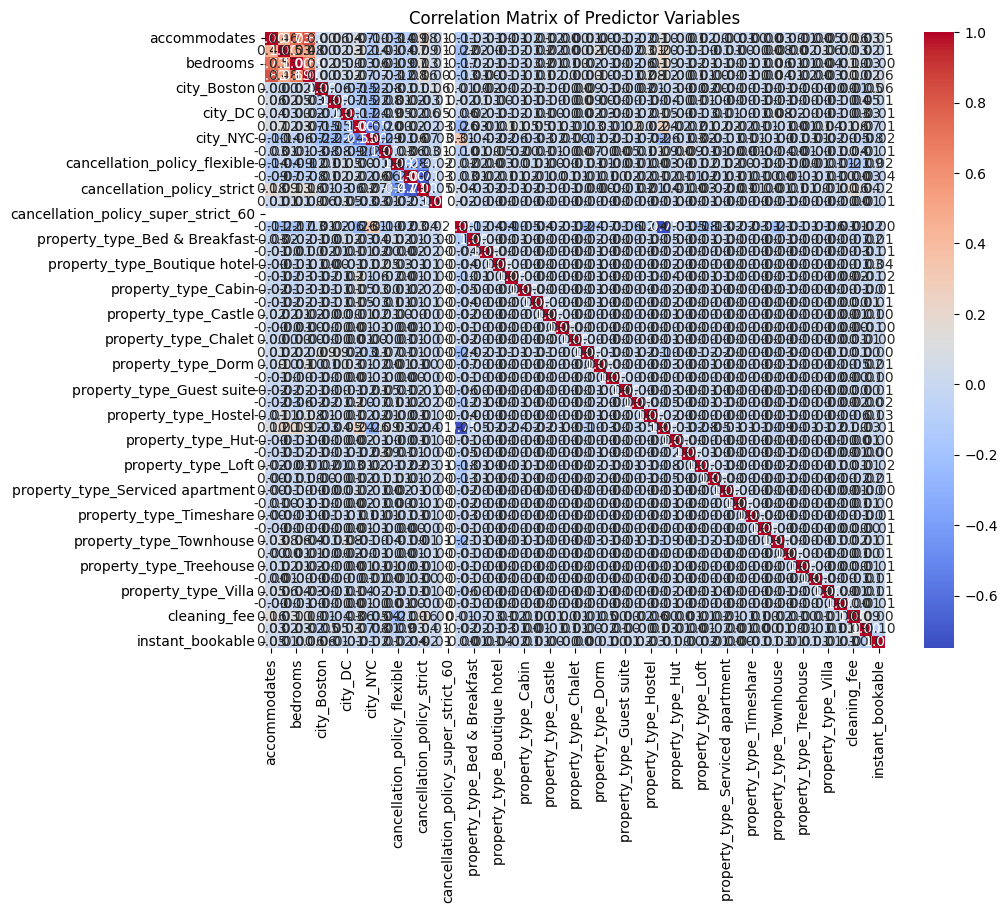

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is your DataFrame containing predictor variables
correlation_matrix = X_train.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictor Variables")
plt.show()


In [58]:
# Drop the 'beds' column from X_train_with_const
X_train_with_const.drop(columns=['beds'], inplace=True)

# Fit the regression model
regression_model = sm.OLS(y_train, X_train_with_const)
regression_results = regression_model.fit()

# Print summary of the regression results
print(regression_results.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2556.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:06:15   Log-Likelihood:                -13964.
No. Observations:               26802   AIC:                         2.796e+04
Df Residuals:                   26785   BIC:                         2.810e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [20]:
import pandas as pd
import statsmodels.api as sm

# One-hot encode the categorical variables: city, cancellation_policy, room_type
categorical_columns = ['city', 'cancellation_policy', 'room_type']
for column in categorical_columns:
    dummies = pd.get_dummies(new_df[column], prefix=column, drop_first=True)
    new_df = pd.concat([new_df, dummies], axis=1)

# Define the predictor variables (X) and the dependent variable (y)
X = new_df[['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 'host_identity_verified',
            'instant_bookable', 'log_price'] + list(new_df.filter(regex='city_|cancellation_policy_|room_type_').columns)]
y = new_df['review_scores_rating']


In [65]:
# Add constant to predictor variables
X = sm.add_constant(X)

# Fit the regression model
regression_model = sm.OLS(y, X)
regression_results = regression_model.fit()

# Print summary of the regression results
print(regression_results.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.055
Model:                              OLS   Adj. R-squared:                  0.055
Method:                   Least Squares   F-statistic:                     109.2
Date:                  Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                          16:21:43   Log-Likelihood:            -1.1274e+05
No. Observations:                 33503   AIC:                         2.255e+05
Df Residuals:                     33484   BIC:                         2.257e+05
Df Model:                            18                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [24]:
# Convert boolean variables to integers
X[['cleaning_fee', 'host_identity_verified', 'instant_bookable', 'city_Chicago', 'city_DC', 'city_LA', 'city_NYC', 'city_SF', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'room_type_Private room', 'room_type_Shared room']] = X[['cleaning_fee', 'host_identity_verified', 'instant_bookable', 'city_Chicago', 'city_DC', 'city_LA', 'city_NYC', 'city_SF', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'room_type_Private room', 'room_type_Shared room']].astype(int)


<ipython-input-24-f28c242cf7ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['cleaning_fee', 'host_identity_verified', 'instant_bookable', 'city_Chicago', 'city_DC', 'city_LA', 'city_NYC', 'city_SF', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'room_type_Private room', 'room_type_Shared room']] = X[['cleaning_fee', 'host_identity_verified', 'instant_bookable', 'city_Chicago', 'city_DC', 'city_LA', 'city_NYC', 'city_SF', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'room_type_Private room', 'room_type_Shared room']].astype(int)


##Rating dependent variable does worse than log price dependent variable, checking categorical good_review column

In [27]:
# Convert boolean variables to integers
boolean_columns = ['city_Chicago', 'city_DC', 'city_LA', 'city_NYC', 'city_SF',
                   'cancellation_policy_moderate', 'cancellation_policy_strict',
                   'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60',
                   'room_type_Private room', 'room_type_Shared room', 'room_type_Entire home/apt']

new_df[boolean_columns] = new_df[boolean_columns].astype(int)


In [139]:
# Step 2: Select features and target variable
features = ['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee',
            'city_Chicago', 'city_DC', 'city_LA', 'city_NYC', 'city_SF',
            'cancellation_policy_moderate', 'cancellation_policy_strict',
            'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60',
            'room_type_Private room', 'room_type_Shared room', 'room_type_Entire home/apt', 'log_price']
target = 'good_review'

X = new_df[features]
y = new_df[target]

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Split the data into training and testing sets
X = new_df[features]
y = new_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize and fit the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # Initialize the logistic regression model
logistic_model.fit(X_train, y_train)  # Fit the model on the training data


LogisticRegression(max_iter=1000)

In [141]:
# Step 3: Make predictions
y_pred = logistic_model.predict(X_test)

# Step 4: Evaluate the model
print(classification_report(y_test, y_pred))

# Step 5: Optionally, visualize the coefficients
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': logistic_model.coef_[0]})
print(coefficients)

              precision    recall  f1-score   support

           0       0.55      0.12      0.20      2408
           1       0.66      0.95      0.78      4293

    accuracy                           0.65      6701
   macro avg       0.61      0.53      0.49      6701
weighted avg       0.62      0.65      0.57      6701

                                feature  coefficient
0                          accommodates    -0.134420
1                             bathrooms    -0.095105
2                              bedrooms     0.031251
3                          cleaning_fee     0.164598
4                          city_Chicago     0.752591
5                               city_DC     0.434789
6                               city_LA     0.397176
7                              city_NYC    -0.084793
8                               city_SF     0.352454
9          cancellation_policy_moderate     0.410569
10           cancellation_policy_strict    -0.036606
11  cancellation_policy_super_strict_

##Decision Tree

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Convert room_type column into boolean variables
new_df['room_type_Private room'] = (new_df['room_type'] == 'Private room').astype(int)
new_df['room_type_Shared room'] = (new_df['room_type'] == 'Shared room').astype(int)
new_df['room_type_Entire home/apt'] = (new_df['room_type'] == 'Entire home/apt').astype(int)

In [72]:
# Step 2: Select features and target variable
features = ['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee',
            'city_Chicago', 'city_DC', 'city_LA', 'city_NYC', 'city_SF',
            'cancellation_policy_moderate', 'cancellation_policy_strict',
            'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60',
            'room_type_Private room', 'room_type_Shared room', 'room_type_Entire home/apt']
target = 'log_price'

X = new_df[features]
y = new_df[target]



In [73]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the decision tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [75]:
# Step 5: Evaluate the model
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.17195287530089856


##Tune decision tree

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions to search
param_dist = {
    'max_depth': [5, 8, 10],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_leaf_nodes': [None, 5, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}


In [85]:
# Create the decision tree regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Perform random search with cross-validation
random_search = RandomizedSearchCV(tree_regressor, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': [5, 8, 10],
                                        'max_leaf_nodes': [None, 5, 10],
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.2],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d4a550f0130>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d4a550973d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [86]:
# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Train the decision tree regressor with the best parameters
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

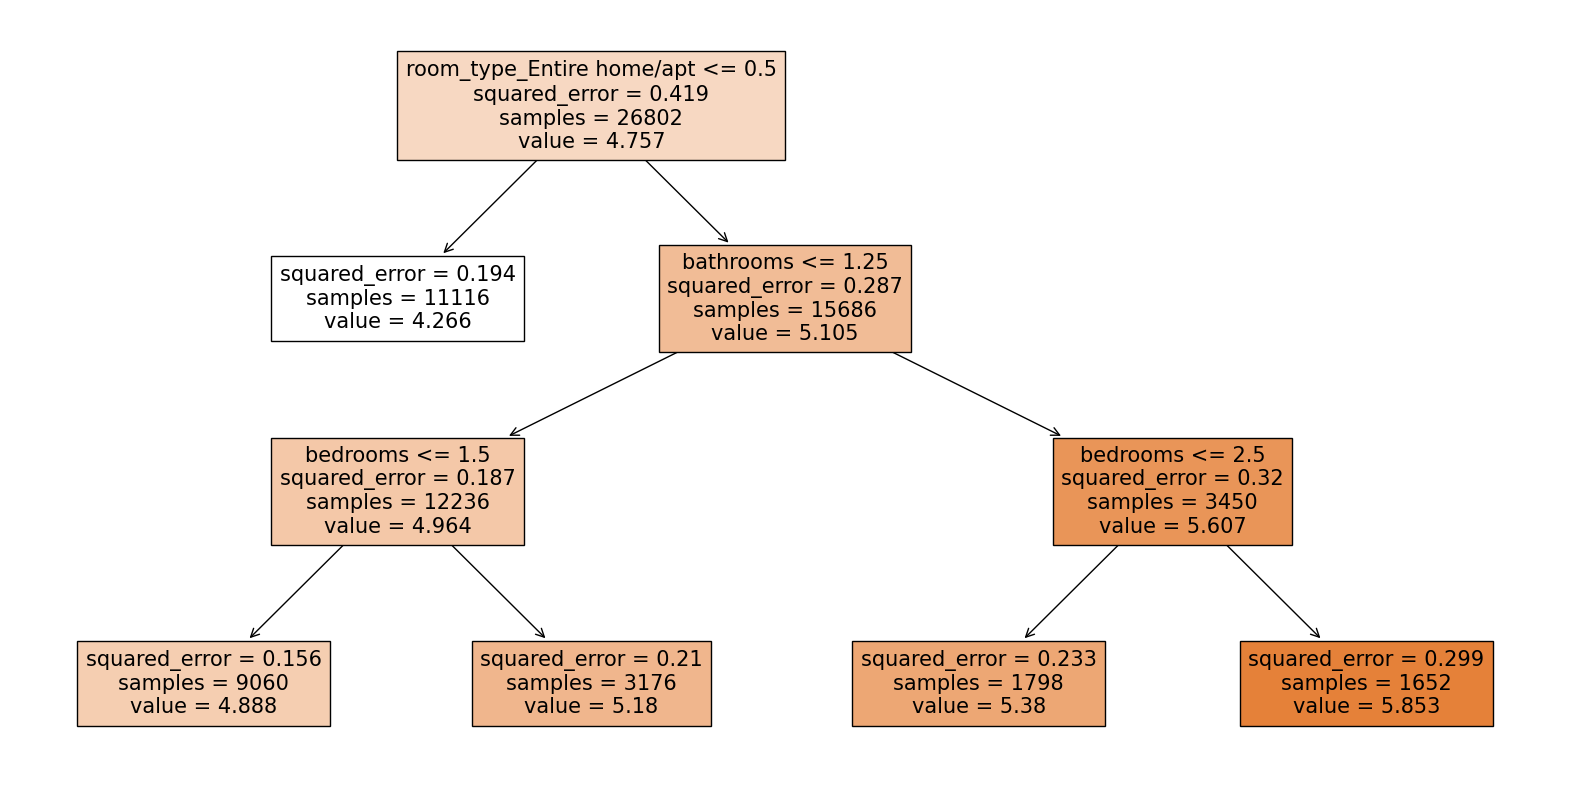

In [87]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_estimator, filled=True, feature_names=X.columns)
plt.show()


##Decision Tree for Categorical Good Review

In [40]:
# Create a new variable 'good_review' based on the review_scores_rating column
new_df['good_review'] = (new_df['review_scores_rating'] >= 93).astype(int)


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [65]:
# Define features and target variable
features = ['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 'city_Chicago', 'city_DC',
            'city_LA', 'city_NYC', 'city_SF', 'cancellation_policy_moderate',
            'cancellation_policy_strict', 'cancellation_policy_super_strict_30',
            'cancellation_policy_super_strict_60', 'room_type_Private room',
            'room_type_Shared room', 'room_type_Entire home/apt','log_price']

target = 'good_review'

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df[features], new_df[target], test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)


In [45]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(tree_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eed809b2620>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eed809b0ee0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eed809b1d50>},
                   random_state=42, scoring='accuracy')

In [46]:
# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 15, 'min_samples_split': 12}


In [47]:
# Get the best model
best_model = random_search.best_estimator_



In [48]:
# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


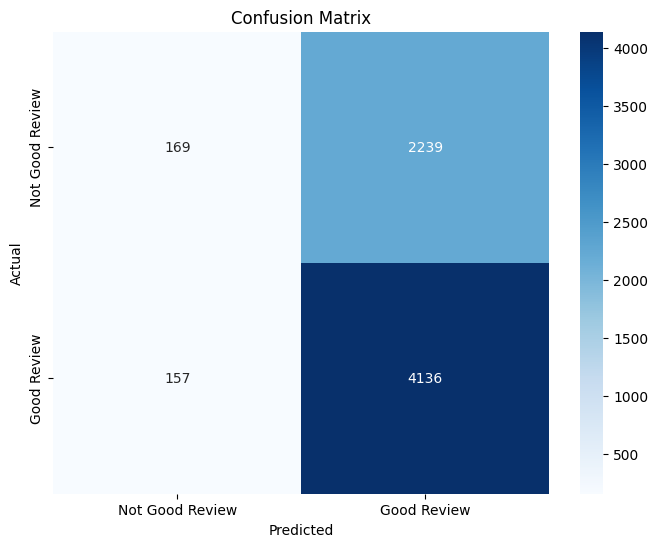

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Good Review', 'Good Review'], yticklabels=['Not Good Review', 'Good Review'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [50]:
# Generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.07      0.12      2408
           1       0.65      0.96      0.78      4293

    accuracy                           0.64      6701
   macro avg       0.58      0.52      0.45      6701
weighted avg       0.60      0.64      0.54      6701



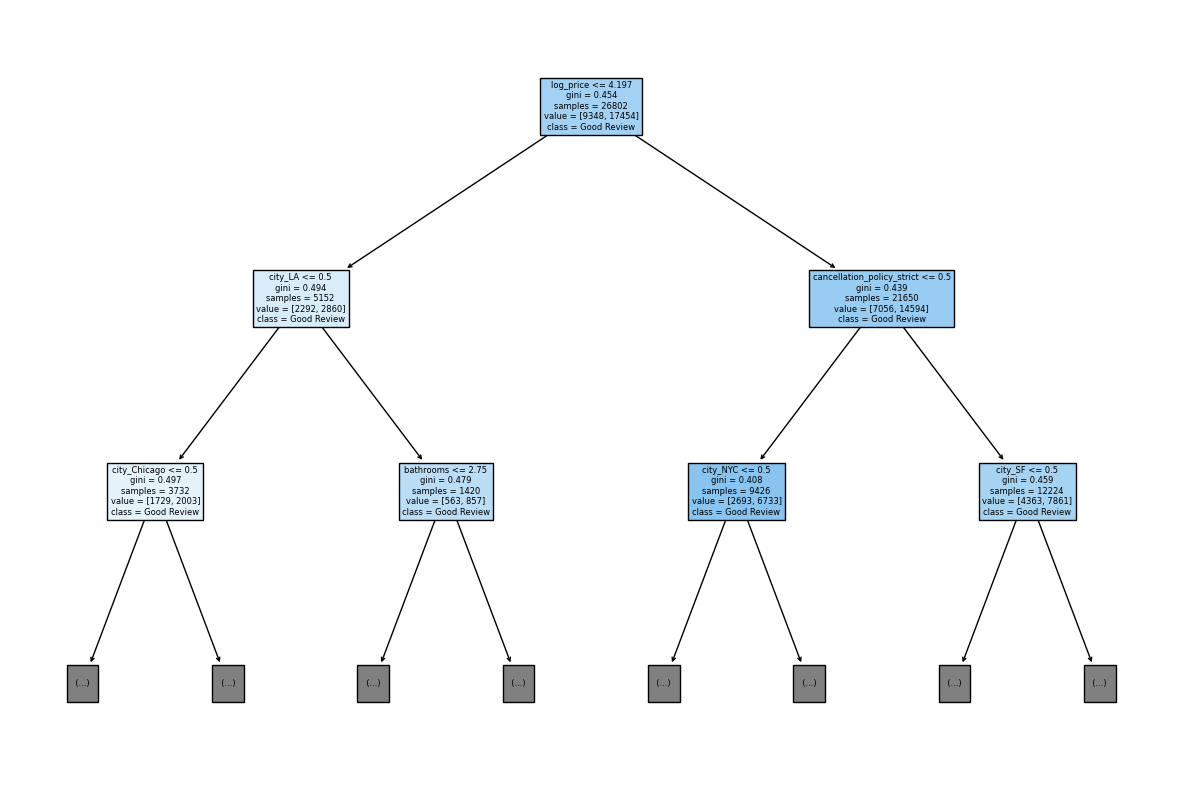

In [120]:
# Visualize the first few levels of the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=features, class_names=['Not Good Review', 'Good Review'], max_depth=2)
plt.show()

##XGBoosting w Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

       False       0.40      0.28      0.33      2065
        True       0.72      0.81      0.76      4636

    accuracy                           0.65      6701
   macro avg       0.56      0.55      0.55      6701
weighted avg       0.62      0.65      0.63      6701



In [51]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier()

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.51      0.20      0.29      2408
           1       0.67      0.90      0.76      4293

    accuracy                           0.64      6701
   macro avg       0.59      0.55      0.52      6701
weighted avg       0.61      0.64      0.59      6701



In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions
param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3 - 0.01),
    'n_estimators': randint(100, 1000),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}


In [54]:
# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier()

# Initialize Randomized Search
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the Randomized Search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'colsample_bytree': 0.8058265802441404, 'learning_rate': 0.012049228513718048, 'max_depth': 3, 'n_estimators': 660, 'subsample': 0.7623873301291946}


In [56]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6499029995523056


In [57]:
# Count the occurrences of each unique value in the 'good_review' column
good_review_counts = new_df['good_review'].value_counts()

# Print the counts
print("Counts of 'good_review':")
print(good_review_counts)


Counts of 'good_review':
good_review
1    21747
0    11756
Name: count, dtype: int64


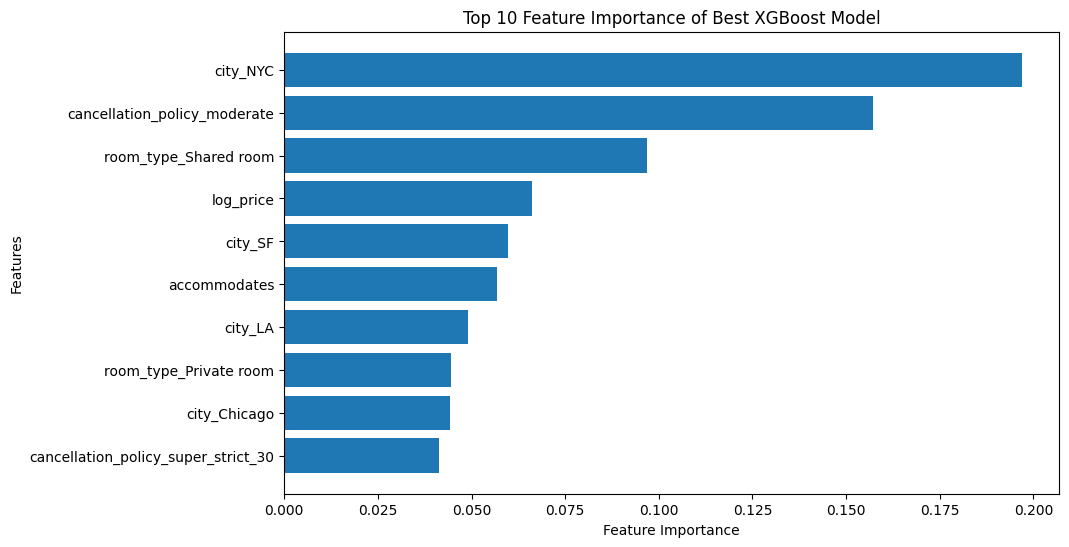

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Get the best XGBoost model from random search
best_xgb_model = random_search.best_estimator_

# Get feature importance scores
importance = best_xgb_model.feature_importances_
features = X_train.columns

# Sort feature importance scores and features in descending order
sorted_idx = np.argsort(importance)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = importance[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_importance[:10], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance of Best XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()



In [64]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = random_search.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 284 2124]
 [ 222 4071]]


In [73]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = random_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.61      0.61      3438
           1       0.59      0.58      0.58      3263

    accuracy                           0.60      6701
   macro avg       0.60      0.60      0.60      6701
weighted avg       0.60      0.60      0.60      6701



##Increase good review threhold to see if class imbalance could still be an issue

In [66]:
# Create a new variable 'good_review' based on the review_scores_rating column
new_df['good_review'] = (new_df['review_scores_rating'] >= 95).astype(int)


In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df[features], new_df[target], test_size=0.2, random_state=42)


In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions
param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3 - 0.01),
    'n_estimators': randint(100, 1000),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

In [69]:
# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier()

# Initialize Randomized Search
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the Randomized Search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 0.8058265802441404, 'learning_rate': 0.012049228513718048, 'max_depth': 3, 'n_estimators': 660, 'subsample': 0.7623873301291946}


In [70]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.597224294881361


In [71]:
# Count the occurrences of each unique value in the 'good_review' column
good_review_counts = new_df['good_review'].value_counts()

# Print the counts
print("Counts of 'good_review':")
print(good_review_counts)

Counts of 'good_review':
good_review
0    16814
1    16689
Name: count, dtype: int64


In [72]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = random_search.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2101 1337]
 [1362 1901]]
